<a href="https://colab.research.google.com/github/vbhsharma7/EDA-hotel-booking-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Import the  all python libraries
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

import folium
import plotly.express as px
%matplotlib inline

import ast 
from datetime import datetime
import math

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone hotel booking/Hotel Bookings.csv')

In [ ]:
hotel_booking_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**DATA DESCRIPTION**
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for yes)                  
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

- Total number of rows in data: 119390
- Total number of columns: 32




In [ ]:

#min,max,mean values of each categorie of 
hotel_booking_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
# creating copy of data frame
df1 = hotel_booking_df.copy()

In [ ]:
#  understanding data cheking for unique values of columns
column_name=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for i in column_name:
  print(f'Unique values in column {i} are:, {(df1[i].unique())}')

Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']


**Data Cleaning**


*  We know that there are a lot of dublicated data that needs to be deleted. 
*   Rows and column should be shaped .
*   Removing the Null Values from the data

* New imortant column that is needed should be created.
*  Conversion of column into  the new data type according to need

*  Removing outlier(it is value that is too small or large  present in data set) if present.





In [ ]:
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [ ]:
# droping the duplicated data
df1=df1.drop_duplicates()

Checking and replacing all the null values with 0

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# replacing null value in agent,children,company with 0
new_columns = ['agent','children','company']
for i in new_columns:
  df1[i].fillna(0,inplace=True)
# replacing country null value with others
df1['country'].fillna('others',inplace=True)

In [ ]:
# checking the null value to be change
df1.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

some rows has (adults+babies+children=0),we have to remove those rows

In [ ]:
#checking the no of rows having value 0
df1[df1['adults']+df1['babies']+df1['children']==0].shape

(0, 32)

In [ ]:
# removing those rows
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [ ]:
# adding some new columns 
df1['total_no_of_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']  

In [ ]:

# converting the column data type
df1[['children','company','agent']]=df1[['children','company','agent']].astype('int64')


In [ ]:
#checking the final shape of row and columns
df1.shape

(87230, 34)

Corelation :-
It is used to define the relation between the two variable.i.e direction of variable (increasing or decreasing) with respect of each other.

In [ ]:
numeric_values = df1[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_stay','total_no_of_people','total_of_special_requests']]

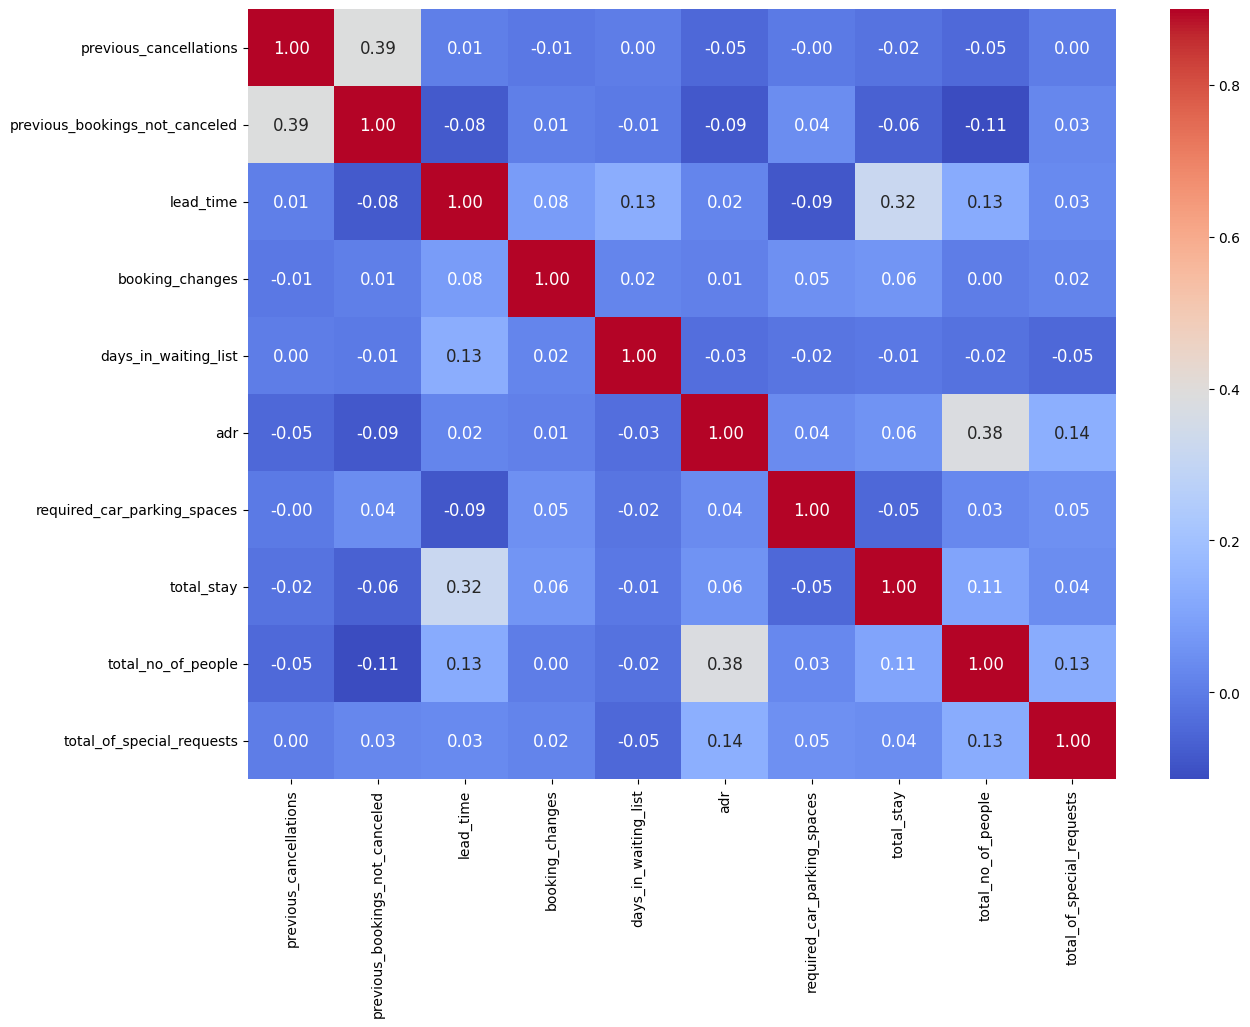

In [ ]:
co_relation_matrix = numeric_values.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',cmap='coolwarm',annot = True, annot_kws={'size': 12},  vmax = .9 )

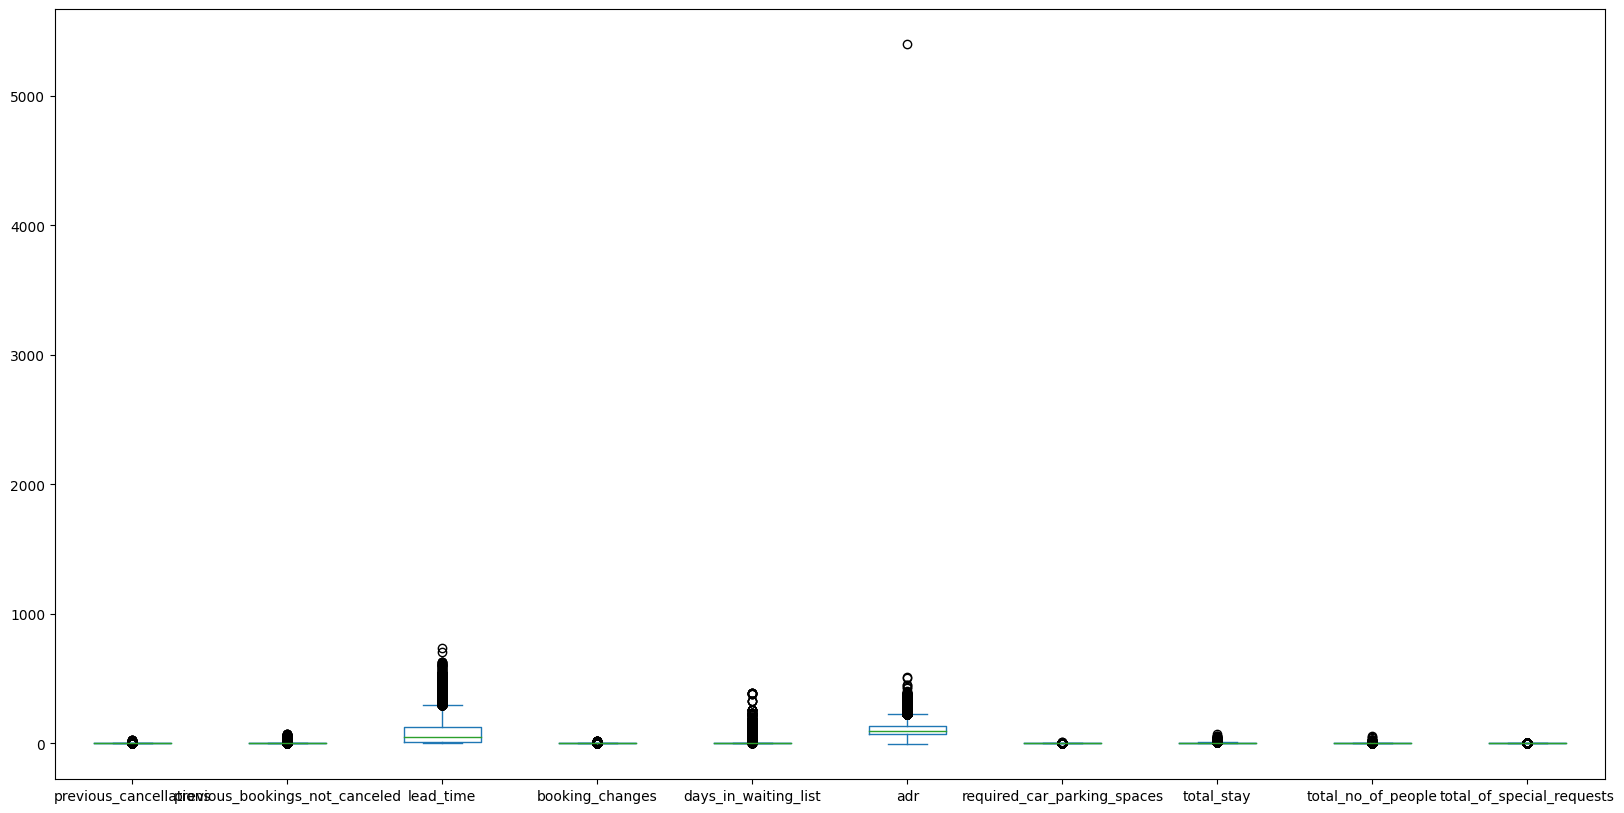

In [ ]:
#identifing the outliners 
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric_values.plot(kind = 'box')

As we have found the outlier  in adr  above value greater than 5000 that needed to be removed.

In [ ]:
# Removing the outlier from data set

df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

# **Exploratory Data Analysis**

**a)Analysis done by using pie chart**

1)WHICH TYPE OF HOTEL  IS PICK BY GUESTS MOST OF THE TIME?

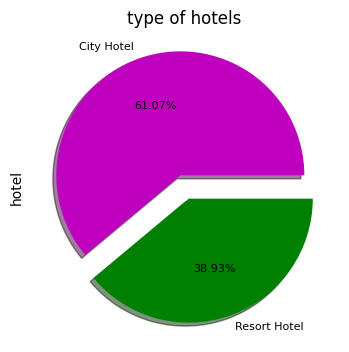

In [ ]:
hotel_type=df1['hotel'].value_counts()
myexplode=[0.1,0.1]
colour=['m','g']
hotel_type.plot.pie( figsize=(4,7), colors=colour, fontsize=8, shadow=True, explode=myexplode, autopct='%1.2f%%')
plt.title('type of hotels')
plt.show()


2) WHICH TYPE OF MEAL IS GUESTS PREFERRED?

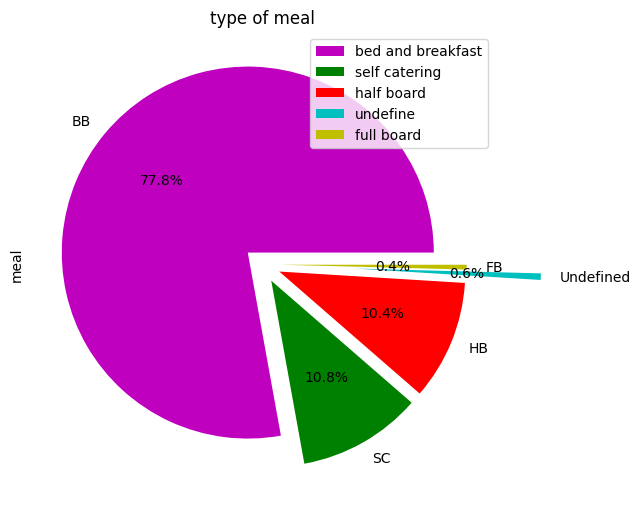

In [ ]:
meal_type=df1['meal'].value_counts()
myexplode=[0.1,0.1,0.1,0.5,0.1]
colour=['m','g','r','c','y']
label=['bed and breakfast', 'self catering', 'half board','undefine','full board']
meal_type.plot.pie( figsize=(6,8), colors=colour, fontsize=10,  explode=myexplode, autopct='%1.1f%%')
plt.title('type of meal')
plt.legend(labels=label)
plt.show()

3) WHICH DISTRIBUTION CHANNEL IS USED BY GUESTS FOR HOTEL BOOKING?

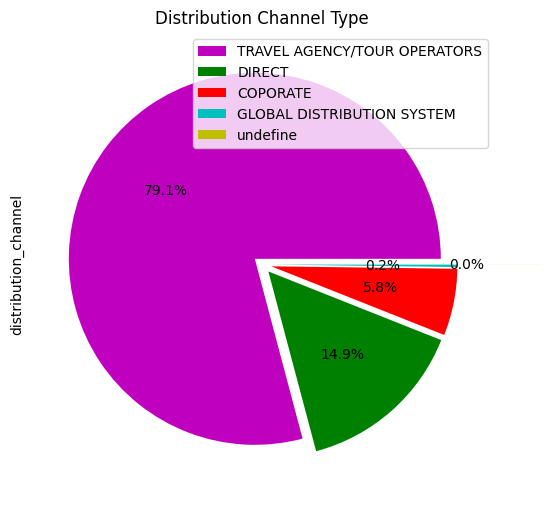

In [ ]:
distribution_type=df1['distribution_channel'].value_counts()
myexplode=[0.05,0.05,0.05,0.05,0.5]
colour=['m','g','r','c','y']
label=['TRAVEL AGENCY/TOUR OPERATORS', 'DIRECT','COPORATE' ,'GLOBAL DISTRIBUTION SYSTEM','undefine']
distribution_type.plot.pie( figsize=(6,8), colors=colour, fontsize=10, explode=myexplode, autopct='%1.1f%%',pctdistance=0.6,labels=None)
plt.title('Distribution Channel Type')
plt.legend(labels=label)

plt.show()

4)WHAT  IS THE PERCENTAGE DISTRIBUTION OF CUSTOMER TYPE?

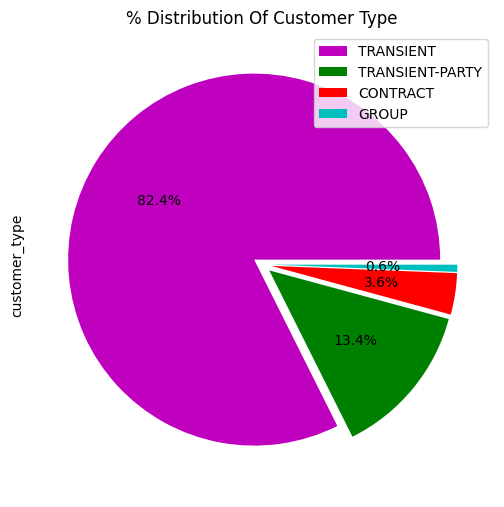

In [ ]:
customer_type=df1['customer_type'].value_counts()
myexplode=[0.05,0.05,0.05,0.05]
colour=['m','g','r','c']
label=['TRANSIENT', 'TRANSIENT-PARTY','CONTRACT' ,'GROUP']
customer_type.plot.pie( figsize=(6,8), colors=colour, fontsize=10, explode=myexplode, autopct='%1.1f%%',pctdistance=0.6,labels=None)
plt.title('% Distribution Of Customer Type')
plt.legend(labels=label)

plt.show()

 5) WHAT IS THE PERCENTAGE DISTRIBUTION OF DEPOSIT TYPE?

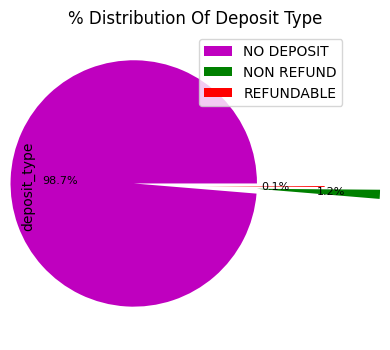

In [ ]:
depo_type=df1['deposit_type'].value_counts()
myexplode=[0.5,0.5,0.05]
colour=['m','g','r']
label=['NO DEPOSIT', 'NON REFUND','REFUNDABLE' ]
depo_type.plot.pie( figsize=(5,4), colors=colour, fontsize=8, explode=myexplode, autopct='%1.1f%%',labels=None)
plt.title('% Distribution Of Deposit Type')
plt.legend(labels=label)
plt.show()


6)WHAT IS THE PERCENTAGE OF REPEATED GUESTS?

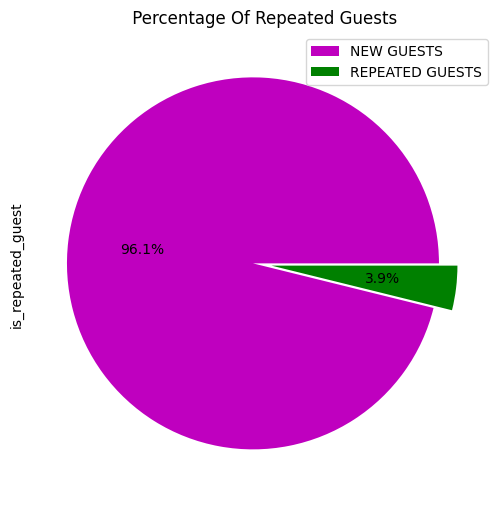

In [ ]:
repeated_guests=df1['is_repeated_guest'].value_counts()
myexplode=[0.05,0.05]
colour=['m','g']
label=['NEW GUESTS','REPEATED GUESTS']
repeated_guests.plot.pie( figsize=(6,8), colors=colour, fontsize=10, explode=myexplode, autopct='%1.1f%%',pctdistance=0.6,labels=None)
plt.title(' Percentage Of Repeated Guests')
plt.legend(labels=label)

plt.show()

7) WHAT IS PERCENTAGE  DISTRIBUTION OF REQUIRED CAR PARKING SPACE?

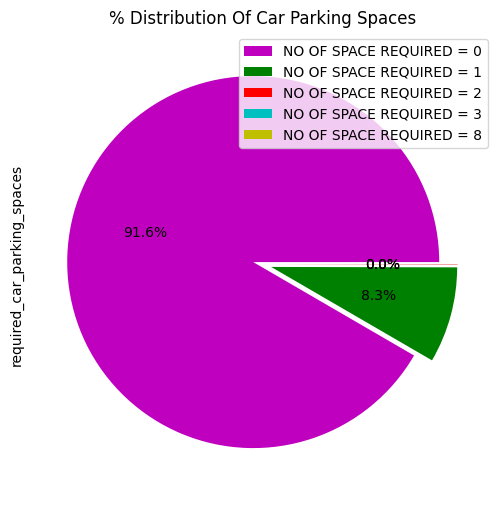

In [ ]:
car_parking_space=df1['required_car_parking_spaces'].value_counts()
myexplode=[0.05,0.05,0.05,0.05,0.05]
colour=['m','g','r','c','y']
label=['NO OF SPACE REQUIRED = 0', 'NO OF SPACE REQUIRED = 1','NO OF SPACE REQUIRED = 2','NO OF SPACE REQUIRED = 3','NO OF SPACE REQUIRED = 8']
car_parking_space.plot.pie( figsize=(6,8), colors=colour, fontsize=10, explode=myexplode, autopct='%1.1f%%',pctdistance=0.6,labels=None)
plt.title('% Distribution Of Car Parking Spaces')
plt.legend(labels=label)

plt.show()

8) WHAT IS PERCENTAGE OF HOTEL CANCELATION RATE?

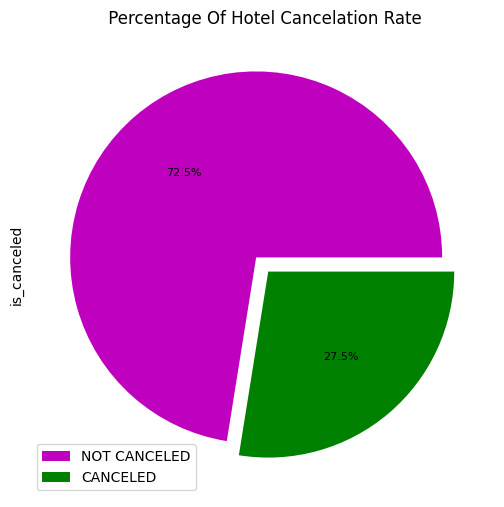

In [ ]:
cancelation_rate=df1['is_canceled'].value_counts()
myexplode=[0.05,0.05]
colour=['m','g']
label=['NOT CANCELED','CANCELED']
cancelation_rate.plot.pie( figsize=(6,8), colors=colour, fontsize=8, explode=myexplode, autopct='%1.1f%%',pctdistance=0.6,labels=None)
plt.title(' Percentage Of Hotel Cancelation Rate')
plt.legend(labels=label)

plt.show()

**b) Analysis done with the use of bar plot**